In [78]:
import pandas as pd
df = pd.read_csv('./test_bbl.csv')
df.drop(columns="Unnamed: 0", inplace=True)
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y-%m')      # 데이터 타입 datetime으로 변경
df["날짜"] = df["날짜"].dt.strftime('%Y%m') # datetime 형식 설정
df.set_index("날짜", inplace=True) # 날짜 컬럼 인덱스 설정
df

,연료,소매판매지수_증감률,도입단가_등락률,동월_평균_등락률,전체_평균_대비,소비
날짜,,,,,,
201001,-9.6,-0.095082,-0.006361,-4.100000,1,0
201002,-4.0,-0.016908,-0.058899,-8.346154,0,0
201003,14.1,0.054054,0.051701,11.684615,1,1
201004,0.3,-0.018648,0.084088,-2.684615,1,1
201005,-1.7,0.042755,0.013126,3.225000,0,0
...,...,...,...,...,...,...
202112,-0.1,0.020048,-0.009709,2.191667,0,0
202201,-1.9,-0.076258,-0.030637,-4.100000,1,0
202202,-10.7,-0.081702,0.113780,-8.346154,0,0


In [79]:
data = df[["연료","소매판매지수_증감률","도입단가_등락률","동월_평균_등락률","전체_평균_대비"]]
target = df["소비"]

In [80]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [75]:
ss.fit(data)

StandardScaler()

In [708]:
params = {'C':[0, 0.1, 1, 10, 20]}

In [709]:
lr = LogisticRegression()
rg = Ridge()
ls = Lasso()
logisticreg = LogisticRegression()
detreec = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
xgb = XGBClassifier()

In [710]:
splitter = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
scores_logistic = cross_validate(lr, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_ridge = cross_validate(rg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_lasso = cross_validate(ls, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_logisticreg = cross_validate(logisticreg, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dectree = cross_validate(detreec, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_randomforest = cross_validate(randomforest, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_xgb = cross_validate(xgb, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [711]:
print('로지스틱 train data score : ',np.mean(scores_logistic['train_score'])) 
print('로지스틱 test data score : ',np.mean(scores_logistic['test_score']))  
print('릿지 train data score : ',np.mean(scores_ridge['train_score'])) 
print('릿지 test data score : ',np.mean(scores_ridge['test_score']))  
print('라쏘 train data score : ', np.mean(scores_lasso['train_score'])) 
print('라쏘 test data score : ', np.mean(scores_lasso['test_score'])) 
print('결정트리(Decision Tree) train data score : ',np.mean(scores_dectree['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dectree['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_randomforest['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_randomforest['test_score']))
print('XGB train data score : ',np.mean(scores_xgb['train_score']))
print('XGB test data score : ',np.mean(scores_xgb['test_score']))

로지스틱 train data score :  0.86
로지스틱 test data score :  0.85
릿지 train data score :  0.5263615836801153
릿지 test data score :  0.49116391560863987
라쏘 train data score :  0.39653558279683
라쏘 test data score :  0.3889502030935384
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.9500000000000001
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9333333333333335
XGB train data score :  1.0
XGB test data score :  0.9500000000000001


In [84]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=False, test_size= 0.2, random_state=11)
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=11)

In [85]:
X_test

,연료,소매판매지수_증감률,도입단가_등락률,동월_평균_등락률,전체_평균_대비
날짜,,,,,
201911,1.4,0.040622,-0.007622,0.933333,0
201912,2.9,0.009967,0.012289,2.191667,0
202001,-2.6,-0.080592,0.051593,-4.100000,1
202002,-11.4,-0.125224,-0.010101,-8.346154,0
202003,-3.4,0.093047,-0.169096,11.684615,1
202004,-9.2,0.018709,-0.342105,-2.684615,1
202005,-3.2,0.087236,-0.357333,3.225000,0
202006,2.6,-0.012669,0.165975,-3.175000,1
202007,4.2,-0.051326,0.398577,4.450000,1


In [86]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(118, 5), 테스트 세트 Shape:(30, 5)
 학습 세트 레이블 값 분포 비율
0    0.70339
1    0.29661
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.152542
1    0.101695
Name: 소비, dtype: float64


In [87]:
df_clf = DecisionTreeClassifier(random_state=11)

In [88]:
xg_clf = XGBClassifier(random_state=11)

In [89]:
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [90]:
X_pred = df_clf.predict(X_test)

In [91]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_pred)))

예측 정확도: 0.8667


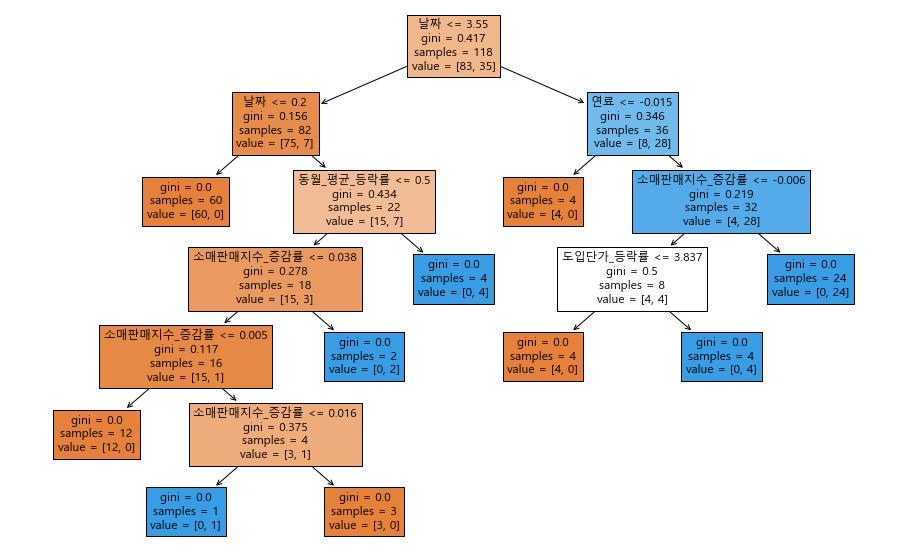

In [92]:
from sklearn.tree import plot_tree

feature_names = ["날짜","연료","소매판매지수_증감률","도입단가_등락률","동월_평균_등락률","전체_평균_대비"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
plot_tree(df_clf, filled=True, feature_names=feature_names)
plt.show()

In [93]:
df_clf.feature_importances_

array([0.55338931, 0.11057564, 0.16247849, 0.08123924, 0.09231732])

<AxesSubplot:title={'center':'피처중요도'}>

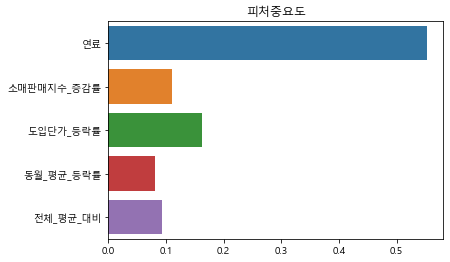

In [94]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.title("피처중요도")
sns.barplot(x=df_clf.feature_importances_, y=data.columns)

In [95]:
num_of_train = int(len(data) * 0.7)
num_of_test = int(len(data) - num_of_train)

print('훈련 데이터 크기:', num_of_train)
print('테스트 데이터 크기:', num_of_test)

훈련 데이터 크기: 103
테스트 데이터 크기: 45


In [96]:
X_train = data[:num_of_train] 
X_test = data[num_of_train:] 
y_train = target[:num_of_train] 
y_test = target[num_of_train:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
          연료  소매판매지수_증감률  도입단가_등락률  동월_평균_등락률  전체_평균_대비
날짜                                                     
201808   0.6   -0.034296  0.029255   3.166667         0
201809  -3.5    0.028037 -0.005168  -5.533333         0
201810   4.0    0.032727  0.038961   3.200000         0
201811  -2.0    0.022887 -0.011250   0.933333         0
201812  -3.9    0.001721 -0.141593   2.191667         0
201901  -7.0   -0.056701 -0.103093  -4.100000         1
201902 -11.6   -0.091075  0.004926  -8.346154         0
201903  13.9    0.162325  0.057190  11.684615         1
201904  -0.8   -0.039655  0.049459  -2.684615         1
201905   8.4    0.046679  0.079529   3.225000         0
201906  -4.9   -0.056604 -0.055935  -3.175000         1
201907  -0.7    0.004545 -0.028902   4.450000         1
201908   7.1    0.009050 -0.029762   3.166667         0
201909  -8.9    0.016143 -0.003067  -5.533333         0
201910   7.1    0.021183  0.009231   3.200000         0
201911   1.4    0.040622 -0.007622  

In [97]:
X_train = data[:119] 
X_test = data[120:] 
y_train = target[:119] 
y_test = target[120:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
          연료  소매판매지수_증감률  도입단가_등락률  동월_평균_등락률  전체_평균_대비
날짜                                                     
202001  -2.6   -0.080592  0.051593  -4.100000         1
202002 -11.4   -0.125224 -0.010101  -8.346154         0
202003  -3.4    0.093047 -0.169096  11.684615         1
202004  -9.2    0.018709 -0.342105  -2.684615         1
202005  -3.2    0.087236 -0.357333   3.225000         0
202006   2.6   -0.012669  0.165975  -3.175000         1
202007   4.2   -0.051326  0.398577   4.450000         1
202008   1.9    0.007214  0.127226   3.166667         0
202009  -3.3    0.056401  0.045147  -5.533333         0
202010   1.0   -0.018644 -0.066955   3.200000         0
202011   0.8    0.027634 -0.034722   0.933333         0
202012   4.7    0.000840  0.081535   2.191667         0
202101   1.6   -0.057935  0.135255  -4.100000         1
202102  -3.3   -0.053476  0.099609  -8.346154         0
202103  14.6    0.125235  0.110124  11.684615         1
202104  -1.2   -0.005021  0.038400  

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

data = df[["연료","소매판매지수_증감률","도입단가_등락률","동월_평균_등락률","전체_평균_대비"]]
target = df["소비"]

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('\nLogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8571
DecisionTreeClassifier roc_auc: 0.850

RandomForestClassifier 정확도: 0.8214
DecisionTreeClassifier roc_auc: 0.821

LogisticRegression 정확도: 0.8929
DecisionTreeClassifier roc_auc: 0.864


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 1.0000
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 1.0000
교차 검증 4 정확도: 0.8621
평균 정확도: 0.9724


In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8667
교차 검증 1 정확도: 0.9667
교차 검증 2 정확도: 0.9667
교차 검증 3 정확도: 1.0000
교차 검증 4 정확도: 0.9310
평균 정확도: 0.9462


In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5],\
            'min_samples_leaf':[1, 5, 8]}

# DecisionTreeClassifier GridSearchCV
def best_dtparam(clf, param, scoring_name, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    
best_dtparam(dt_clf, parameters, 'accuracy', 5)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.8822
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8214


In [52]:
parameters = {\
        'n_estimators':[100],\
        'max_depth' : [6, 8, 10, 12],\
        'min_samples_leaf' : [8, 12, 18],\
        'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier GridSearchCV
def best_rfparam(clf, param, cv_num, n_jobs_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, n_jobs=n_jobs_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(rf_clf, parameters, 2, -1)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.8993
테스트 세트에서의 RandomForestClassifier 정확도 : 0.7857


In [53]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=11)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.7500


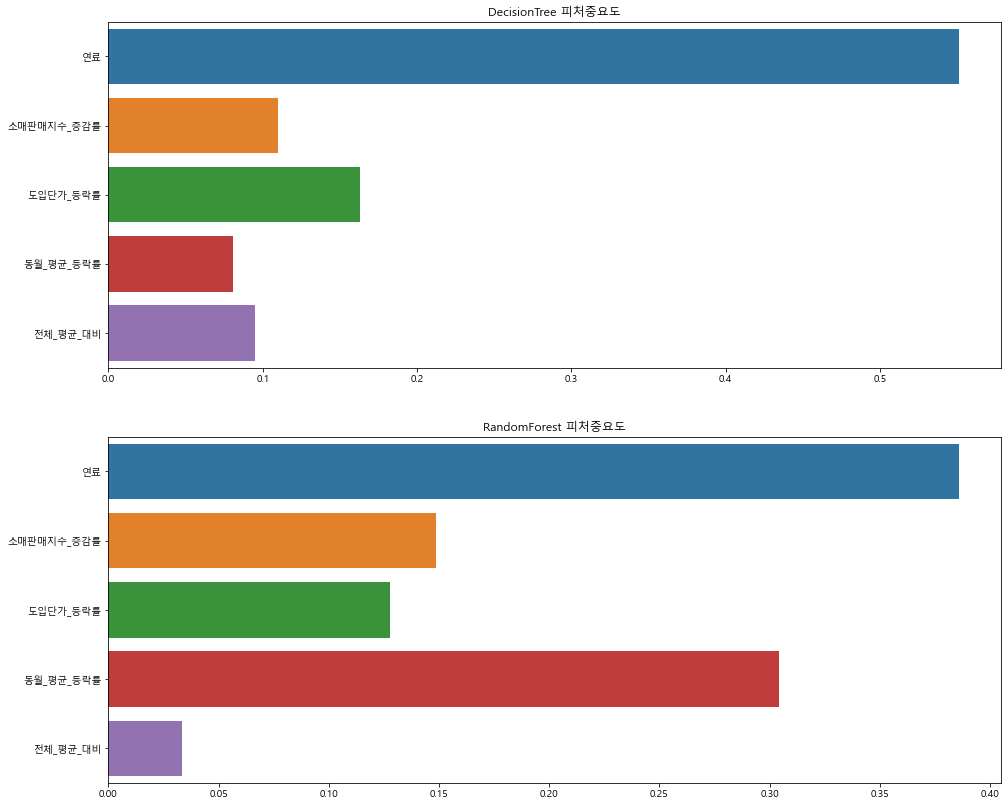

In [54]:
fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

In [64]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, dt_pred)
print("오차행렬:\n", c_matrix)

오차행렬:
 [[16  1]
 [ 1 10]]


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, dt_pred)
    accuracy = accuracy_score(y_test, dt_pred)
    precision = precision_score(y_test, dt_pred)
    recall = recall_score(y_test, dt_pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
get_clf_eval(y_test, dt_pred)

오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091


In [66]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])

pred_proba()결과 Shape : (28, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[9.99840882e-01 1.59117704e-04]
 [9.99404415e-01 5.95584592e-04]
 [9.93724026e-01 6.27597374e-03]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: 
 [[9.99840882e-01 1.59117704e-04 0.00000000e+00]
 [9.99404415e-01 5.95584592e-04 0.00000000e+00]
 [9.93724026e-01 6.27597374e-03 0.00000000e+00]]


In [67]:
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091
임곗값: 0.45
오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091
임곗값: 0.5
오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091
임곗값: 0.55
오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091
임곗값: 0.6
오차 행렬
[[16  1]
 [ 1 10]]
정확도: 0.9286, 정밀도: 0.9091, 재현율: 0.9091


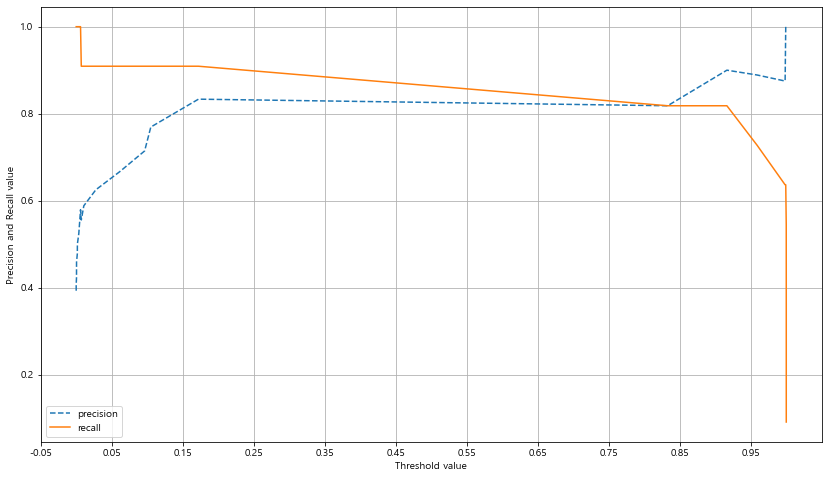

In [68]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [35]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, dt_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9091


In [36]:
def get_clf_eval(y_test, dt_pred):
    confusion = confusion_matrix(y_test, dt_pred)
    accuracy = accuracy_score(y_test, dt_pred)
    precision = precision_score(y_test, dt_pred)
    recall = recall_score(y_test, dt_pred)
    f1 = f1_score(y_test, dt_pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차행렬
[[15  2]
 [ 2  9]]
정확도: 0.8571, 정밀도: 0.8182, 재현율: 0.8182, F1:0.8182
임곗값: 0.45
오차행렬
[[15  2]
 [ 2  9]]
정확도: 0.8571, 정밀도: 0.8182, 재현율: 0.8182, F1:0.8182
임곗값: 0.5
오차행렬
[[15  2]
 [ 2  9]]
정확도: 0.8571, 정밀도: 0.8182, 재현율: 0.8182, F1:0.8182
임곗값: 0.55
오차행렬
[[15  2]
 [ 2  9]]
정확도: 0.8571, 정밀도: 0.8182, 재현율: 0.8182, F1:0.8182
임곗값: 0.6
오차행렬
[[15  2]
 [ 2  9]]
정확도: 0.8571, 정밀도: 0.8182, 재현율: 0.8182, F1:0.8182


In [37]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = dt_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1]
샘플 index로 추출한 임곗값:  [1.]
샘플 임곗값별 FPR:  [0.059]
샘플 임곗값별 TPR:  [0.909]


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


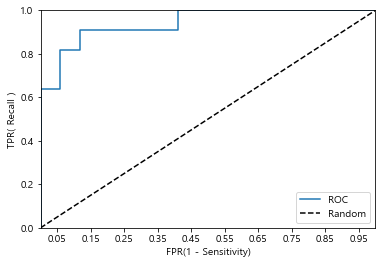

In [38]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선
    plt.plot(fprs, tprs, label="ROC")
    # 가운데 대각선 점선
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR( Recall )')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

In [39]:
from sklearn.metrics import roc_auc_score

pred_proba = dt_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9251


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [41]:
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

NameError: name 'kfold' is not defined

In [99]:
xg_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=11,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
X_predic = xg_clf.predict(X_test)

In [101]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, X_predic)))

예측 정확도: 1.0000


In [102]:
xg_clf.feature_importances_

array([0.6017201 , 0.05355098, 0.09718707, 0.14191923, 0.10562265],
      dtype=float32)

<AxesSubplot:title={'center':'피처중요도'}>

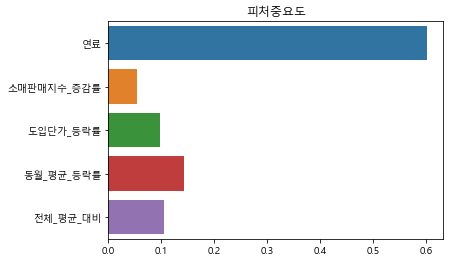

In [103]:
# 피처 중요도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.title("피처중요도")
sns.barplot(x=xg_clf.feature_importances_, y=data.columns)

In [104]:
ra_clf = RandomForestClassifier(random_state=11)
ra_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [105]:
ra_X_predic = ra_clf.predict(X_test)

In [106]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, ra_X_predic)))

예측 정확도: 0.8214


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
model = RandomForestClassifier()
model.fit(X_train, y_train)


estimator = model.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [116]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='tree1.dot', impurity=
               True , filled=True)

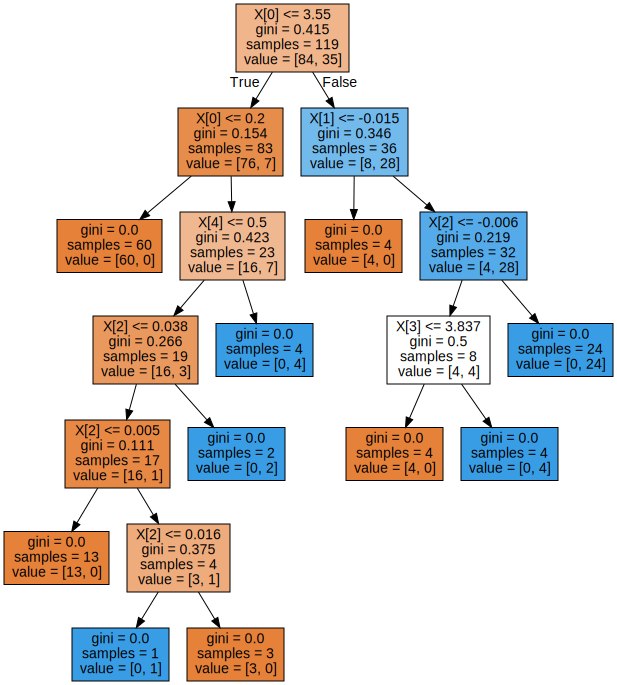

In [117]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree1.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)